<a href="https://colab.research.google.com/github/bariskucuk1999/data-science-notes/blob/main/Do%C4%9Frusal_ve_%C3%87oklu_Do%C4%9Frusal_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Doğrusal Regresyon**

Text(0, 0.5, 'Satışlar')

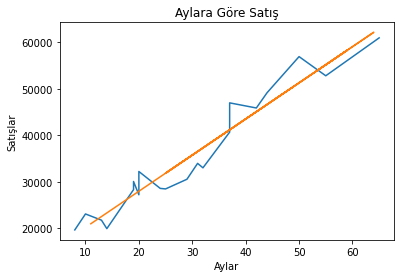

In [ ]:
#y=ax+b için; y=bağımlı değişken, x=bağımsız değişken, a=katsayı
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
veriler=pd.read_csv("satislar.txt")
aylar=veriler[["Aylar"]]
satislar=veriler[["Satislar"]]
satislar2=veriler.iloc[:,:1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(aylar,satislar,test_size=0.33,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#X_train=sc.fit_transform(x_train)
#X_test=sc.fit_transform(x_test)
#Y_train=sc.fit_transform(y_train)
#Y_test=sc.fit_transform(y_test)
from sklearn.linear_model import LinearRegression #model inşası
lr=LinearRegression()
lr.fit(x_train,y_train)

tahmin=lr.predict(x_test)
x_train=x_train.sort_index()
y_train=y_train.sort_index()
plt.plot(x_train,y_train)
plt.plot(x_test,lr.predict(x_test))
plt.title("Aylara Göre Satış")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")
#x_train'den y_train'i öğreniyor(modeli inşa ediyor) sonrasında x_test'ten y_test'i oluşturuyor(kendi tahmin sonuçlarını çıkarıyor)

# **Farklı Yaklaşımlar**
*   **Bütün değişkenleri dahil etmek**

1.   *Örn. Bankadaki kredi skorları için geliştirilen modelin başarısının ölçülmesi*

*   **Geriye doğru eleme(Backward elimination)**

2.   *Significance Level(SL) seçilir.(Genelde 0.05)  Bütün değişkenlerle model inşa edilir. En yüksek p-value olan değişken için P>SL ise 4. adım, değilse 6. adıma gidilir. Sonrasında seçilen max p-value değişkeni kaldırılır. ML güncellenir ve 3. adıma dönülür.*

*   **İleri seçim(Forward selection)**

3.   *SL seçilir.(Genelde 0.05) Üstteki elemeden farklı olarak en düşük p-value olan değişken için sabit tutulur yeni bir değişken daha seçilip sisteme eklenir. ML güncellenir, 3. adıma dönülür. En düşük p-value değişkeni p < SL ise 3. adıma dönülür. Değilse ML sonlandırılır.*

*   **İki yönlü eleme(Bidirectional elimination)**

4.   *Üstteki iki yöntemin birleşimi gibidir. Bütün değişkenlerle model inşa edilir. En düşük p-value değişkeni için sabit tutulur diğer bütün değişkenler sisteme dahil edilir. En düşük p-value sistemde kalır. SL değerinin altında olan değişkenler sistemde kalır. Eski değişkenler sistemden çıkarılamaz. ML sonlandırılır.*

*   **Skor karşılaştırması(Score comparison)**

5.   *Kendi kriterini kendin belirleme. Başarı kriteri belirlenerek bütün olası regresyon modelleri inşa edilir.(ikili seçim olur) Başta belirlenen kriteri en iyi sağlayan yöntem seçilir. ML sonlandırılır.*








**Çoklu Doğrusal Regresyon (Multiple Linear Regression)** y=b0+b1x1+b2x2+b3x3+e

In [ ]:
#e=hata miktarı, örneğin; Boy=a+b(kilo)+c(yaş)+d(ayakkabı no)+e

In [ ]:
veriler=pd.read_csv("veriler.txt")
#cinsiyet ve ülke column'unu nümerik değerlere çevirmek istiyoruz

from sklearn.impute import SimpleImputer #eksik verileri tamamlamak
imputer=SimpleImputer(missing_values=np.nan, strategy="mean")
Yas=veriler.iloc[:,1:4].values
imputer=imputer.fit(Yas[:,1:4])
Yas[:,1:4]=imputer.transform(Yas[:,1:4])

ulke=veriler.iloc[:,0:1].values #categoric--->numeric
from sklearn import preprocessing
le=preprocessing.LabelEncoder() 
ulke[:,0]=le.fit_transform(veriler.iloc[:,0])
ohe=preprocessing.OneHotEncoder() 
ulke=ohe.fit_transform(ulke).toarray()

c=veriler.iloc[:,-1:].values
from sklearn import preprocessing
le=preprocessing.LabelEncoder() #kategorik column dönüşümü için
c[:,-1]=le.fit_transform(veriler.iloc[:,-1])
ohe=preprocessing.OneHotEncoder() #column başlıklarını etiketlere taşıma ve her etiketin altında 0 veya 1 aitliğini belirleme
c=ohe.fit_transform(c).toarray()

sonuc=pd.DataFrame(data=ulke, index=range(22),columns=["fr","tr","us"]) #numpy dizisi-->dataframe
sonuc2=pd.DataFrame(data=Yas, index=range(22),columns=["boy","kilo","yas"])
cinsiyet=veriler.iloc[:,-1].values
sonuc3=pd.DataFrame(data=c[:,:1],index=range(22),columns=["cinsiyet"])
s=pd.concat([sonuc,sonuc2],axis=1) #dataframe'lerin birleştirilmesi
s2=pd.concat([s,sonuc3],axis=1)
s2 #ülke column'ları için nümerik hale geldi

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,1.0
1,0.0,1.0,0.0,125,36,11,1.0
2,0.0,1.0,0.0,135,34,10,0.0
3,0.0,1.0,0.0,133,30,9,0.0
4,0.0,1.0,0.0,129,38,12,1.0
5,0.0,1.0,0.0,180,90,30,1.0
6,0.0,1.0,0.0,190,80,25,1.0
7,0.0,1.0,0.0,175,90,35,1.0
8,0.0,1.0,0.0,177,60,22,0.0
9,0.0,0.0,1.0,185,105,33,1.0


In [ ]:
sonuc3 #cinsiyet column'u da nümerik hale getirildi

,cinsiyet
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


In [ ]:
s2 #tablomuzun son hali

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,1.0
1,0.0,1.0,0.0,125,36,11,1.0
2,0.0,1.0,0.0,135,34,10,0.0
3,0.0,1.0,0.0,133,30,9,0.0
4,0.0,1.0,0.0,129,38,12,1.0
5,0.0,1.0,0.0,180,90,30,1.0
6,0.0,1.0,0.0,190,80,25,1.0
7,0.0,1.0,0.0,175,90,35,1.0
8,0.0,1.0,0.0,177,60,22,0.0
9,0.0,0.0,1.0,185,105,33,1.0


In [ ]:
from sklearn.model_selection import train_test_split #verinin eğitim ve test için bölünmesi
x_train, x_test, y_train, y_test=train_test_split(s,sonuc3,test_size=0.33,random_state=0)

#çoklu doğrusal regresyon için;
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train) #x_train'den y_train'i öğrenme
#(x_train->cinsiyet hariç tablodaki veriler, y_train->cinsiyet column'u)
#x_train ve y_train verinin %67'lik kısmı, (test_size=0.33 aldık)
y_pred=regressor.predict(x_test) 
y_pred

array([[ 0.98720204],
       [-0.12036863],
       [ 0.05009703],
       [ 0.07137418],
       [ 0.72473935],
       [ 0.64615044],
       [-0.03567453],
       [ 0.32612171]])

In [ ]:
y_test #y_pred ile karşılaştırırsak; 2 hatalı tahmin diyebiliriz

,cinsiyet
20,0.0
10,0.0
14,0.0
13,0.0
1,1.0
21,0.0
11,0.0
19,0.0


In [ ]:
#boy column'unu almak için;
boy=s2.iloc[:,3:4].values
#tabloda boy column sol ve sağ tarafı için;
sol=s2.iloc[:,:3]
sag=s2.iloc[:,4:]
#sol ve sağındaki verileri birleştirerek eğitim verisi oluşturursak;
veri=pd.concat([sol,sag],axis=1)
veri

,fr,tr,us,kilo,yas,cinsiyet
0,0.0,1.0,0.0,30,10,1.0
1,0.0,1.0,0.0,36,11,1.0
2,0.0,1.0,0.0,34,10,0.0
3,0.0,1.0,0.0,30,9,0.0
4,0.0,1.0,0.0,38,12,1.0
5,0.0,1.0,0.0,90,30,1.0
6,0.0,1.0,0.0,80,25,1.0
7,0.0,1.0,0.0,90,35,1.0
8,0.0,1.0,0.0,60,22,0.0
9,0.0,0.0,1.0,105,33,1.0


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(veri,boy,test_size=0.33,random_state=0)
x_train
#veri'leri(bağımsız değişken) kullanarak boy'a(bağımlı değişken) göre veri kümesini böl


,fr,tr,us,kilo,yas,cinsiyet
8,0.0,1.0,0.0,60,22,0.0
6,0.0,1.0,0.0,80,25,1.0
16,1.0,0.0,0.0,90,23,1.0
4,0.0,1.0,0.0,38,12,1.0
2,0.0,1.0,0.0,34,10,0.0
5,0.0,1.0,0.0,90,30,1.0
17,1.0,0.0,0.0,80,27,1.0
9,0.0,0.0,1.0,105,33,1.0
7,0.0,1.0,0.0,90,35,1.0
18,1.0,0.0,0.0,88,28,1.0


In [ ]:
y_train #bağımsız değişkenlerden(veri) bağımlı değişkeni(boy) predict etme(linear model oluşturma)
#tablodaki verilerle boy tahmini yapıyoruz

array([[177],
       [190],
       [193],
       [129],
       [135],
       [180],
       [187],
       [185],
       [175],
       [183],
       [133],
       [130],
       [174],
       [160]])

In [ ]:
r2=LinearRegression()
r2.fit(x_train,y_train) #x_train'den y_train'i öğrenme
#(x_train->cinsiyet hariç tablodaki veriler, y_train->cinsiyet column'u)
#x_train ve y_train verinin %67'lik kısmı, (test_size=0.33 aldık)
y_pred=r2.predict(x_test)
y_pred #tahmin sonuçları

array([[182.26638686],
       [152.87161474],
       [162.79386375],
       [158.30668577],
       [130.82888952],
       [173.96138408],
       [150.12782663],
       [157.26898922]])

In [ ]:
y_test #y_pred ile karşılaştırırsak;

array([[164],
       [165],
       [167],
       [162],
       [125],
       [166],
       [155],
       [159]])

**Backward Elimination**

In [ ]:
#column'ların p-value'ları bakarak p-value'su yüksek olanları çıkarıyoruz(tahmindeki bozulmayı azaltma)
#backward elimination kullanırsak;
import statsmodels.api as sm 
X=np.append(arr=np.ones((22,1)).astype(int),values=veri,axis=1) #axis=1 sütun olarak ekle
X #ilk sütuna 1'lerden oluşan yeni bir column eklendi

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([[  1.,   0.,   1.,   0.,  30.,  10.,   1.],
       [  1.,   0.,   1.,   0.,  36.,  11.,   1.],
       [  1.,   0.,   1.,   0.,  34.,  10.,   0.],
       [  1.,   0.,   1.,   0.,  30.,   9.,   0.],
       [  1.,   0.,   1.,   0.,  38.,  12.,   1.],
       [  1.,   0.,   1.,   0.,  90.,  30.,   1.],
       [  1.,   0.,   1.,   0.,  80.,  25.,   1.],
       [  1.,   0.,   1.,   0.,  90.,  35.,   1.],
       [  1.,   0.,   1.,   0.,  60.,  22.,   0.],
       [  1.,   0.,   0.,   1., 105.,  33.,   1.],
       [  1.,   0.,   0.,   1.,  55.,  27.,   0.],
       [  1.,   0.,   0.,   1.,  50.,  44.,   0.],
       [  1.,   0.,   0.,   1.,  58.,  39.,   0.],
       [  1.,   0.,   0.,   1.,  59.,  41.,   0.],
       [  1.,   0.,   0.,   1.,  62.,  55.,   0.],
       [  1.,   1.,   0.,   0.,  70.,  47.,   1.],
       [  1.,   1.,   0.,   0.,  90.,  23.,   1.],
       [  1.,   1.,   0.,   0.,  80.,  27.,   1.],
       [  1.,   1.,   0.,   0.,  88.,  28.,   1.],
       [  1.,   1.,   0.,   0.,

In [ ]:
X_l=veri.iloc[:,[0,1,2,3,4,5]].values #tüm column'ları aldık
X_l=np.array(X_l,dtype=float)
model=sm.OLS(boy,X_l).fit() #bağımlı değişken(boy) ile bağımsız değişkenleri içeren dizi arasında bağlantı
model.summary() #p-value'ları bulmak için

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           5.41e-07
Time:                        16:58:08   Log-Likelihood:                -73.950
No. Observations:                  22   AIC:                             159.9
Df Residuals:                      16   BIC:                             166.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           114.0688      8.145     14.005      0.000      96.802     131.335
x2           108.3030      5.736     18.880      0.000      96.143     120.463
x3           104.4714      9.195     11.361      0.000      84.978     123.964
x4             0.9211      0.119      7.737      0.000       0.669       1.174
x5             0.0814      0.221      0.369      0.717      -0.386       0.549
x6           -10.5980      5.052     -2.098      0.052     -21.308       0.112
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   2.759
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.624
Skew:                           0.407   Prob(JB):                        0.732
Kurtosis:                       2.863   Cond. No.                         524.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#x5'in p-value'su en yüksek olduğundan x5'i eleriz
X_l=veri.iloc[:,[0,1,2,3,5]].values #5. elemanı almadık
X_l=np.array(X_l,dtype=float)
model=sm.OLS(boy,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.47
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           9.32e-08
Time:                        16:58:08   Log-Likelihood:                -74.043
No. Observations:                  22   AIC:                             158.1
Df Residuals:                      17   BIC:                             163.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           115.6583      6.734     17.175      0.000     101.451     129.866
x2           109.0786      5.200     20.978      0.000      98.108     120.049
x3           106.5445      7.090     15.026      0.000      91.585     121.504
x4             0.9405      0.104      9.029      0.000       0.721       1.160
x5           -11.1093      4.733     -2.347      0.031     -21.096      -1.123
==============================================================================
Omnibus:                        0.871   Durbin-Watson:                   2.719
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.459
Skew:                           0.351   Prob(JB):                        0.795
Kurtosis:                       2.910   Cond. No.                         397.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#x5'in p-value'su en yüksek olduğundan x5'i eleriz
X_l=veri.iloc[:,[0,1,2,3]].values #son elemanı almadık
X_l=np.array(X_l,dtype=float)
model=sm.OLS(boy,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     33.16
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           1.52e-07
Time:                        16:58:08   Log-Likelihood:                -77.131
No. Observations:                  22   AIC:                             162.3
Df Residuals:                      18   BIC:                             166.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           119.8136      7.265     16.491      0.000     104.550     135.077
x2           109.8084      5.804     18.919      0.000      97.615     122.002
x3           114.4212      6.984     16.382      0.000      99.747     129.095
x4             0.7904      0.092      8.595      0.000       0.597       0.984
==============================================================================
Omnibus:                        2.925   Durbin-Watson:                   2.855
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                1.499
Skew:                           0.605   Prob(JB):                        0.473
Kurtosis:                       3.416   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""